In [8]:
import lifelines
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np
from lifelines import *
from lifelines.utils import median_survival_times
import pandas as pd
from lifelines import KaplanMeierFitter

In [1]:
path = 'C:/Users/user/Desktop/Survival_Data/Disease/colon.csv'
df = pd.read_csv(path, index_col = 0)

In [2]:
df

,SERIAL_ID,sex,age,icd_10,seercode,event_inc,stime,tx_1,tx_2,tx_3,tx_4,tx_5,seer_TF
0,996,2,66,C187,4.0,1,64,1,1,0,0,0,1
1,1441,2,46,C180,1.0,0,298,1,1,0,0,0,0
2,1658,1,64,C184,1.0,1,241,1,1,0,0,0,0
3,2428,1,47,C20,2.0,1,104,1,1,0,0,0,1
4,3078,2,57,C20,1.0,0,296,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33971,364369,1,82,C20,2.0,1,2,1,0,0,0,0,1
33972,364371,1,64,C180,4.0,0,25,1,0,0,0,0,1
33973,364376,1,52,C185,1.0,0,25,1,0,0,0,0,0
33974,364386,1,56,C182,4.0,0,25,1,1,0,0,0,1


In [3]:
df['tx_3'].value_counts()

tx_3
0    31289
1     2687
Name: count, dtype: int64

In [4]:
df['tx_4'].value_counts()

tx_4
0    33539
1      437
Name: count, dtype: int64

In [5]:
df['tx_5'].value_counts()

tx_5
0    33963
1       13
Name: count, dtype: int64

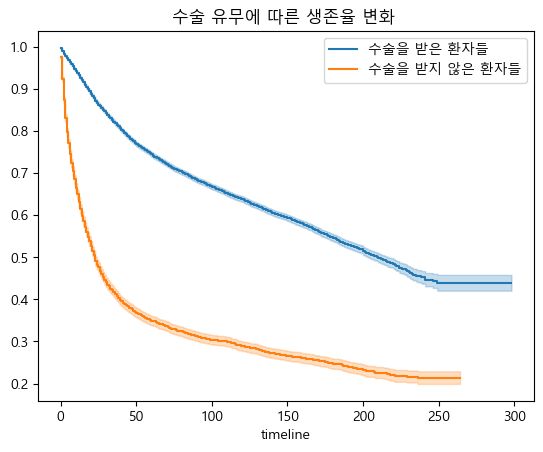

In [11]:
# 한글 폰트 설정
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
kmf = KaplanMeierFitter()
ax = plt.subplot(111)

T = df['stime']
E = df['event_inc']

tx1 = (df['tx_1'] == 1)

kmf.fit(T[tx1], event_observed =E[tx1], label ='수술을 받은 환자들')
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~tx1], event_observed = E[~tx1], label = '수술을 받지 않은 환자들')
kmf.plot_survival_function(ax=ax)

plt.title('수술 유무에 따른 생존율 변화 ');

In [14]:
from lifelines import CoxPHFitter

data =df[['stime','event_inc','tx_1','tx_2','tx_3','seer_TF','sex']]
cph=CoxPHFitter()
cph.fit(data, duration_col='stime', event_col='event_inc')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 33976 total observations, 19331 right-censored observations>
             duration col = 'stime'
                event col = 'event_inc'
      baseline estimation = breslow
   number of observations = 33976
number of events observed = 14645
   partial log-likelihood = -142364.70
         time fit was run = 2024-12-02 02:19:02 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
tx_1      -1.32      0.27      0.02           -1.36           -1.28                0.26                0.28
tx_2      -0.13      0.88      0.02           -0.17           -0.10                0.85                0.91
tx_3      -0.44      0.65      0.03           -0.50           -0.38                0.61                0.69
seer_TF    1.11      3.03      0.02            1.07            1.15                2.91                3.16
sex       -0.10      0.90      0.02           -0.14           -0.07                0.87                0.93

           cmp to      z      p  -log2(p)
covariate                                
tx_1         0.00 -73.51 <0.005       inf
tx_2         0.00  -7.15 <0.005     40.06
tx_3         0.00 -13.95 <0.005    144.60
seer_TF      0.00  52.99 <0.005       inf
sex          0.00  -6.01 <0.005     29.01
---
Concordance = 0.70
Partial AIC = 284739.41
log-likelihood ratio test = 7327.29 on 5 df
-log2(p) of ll-ratio test = inf

<AxesSubplot:xlabel='log(HR) (95% CI)'>

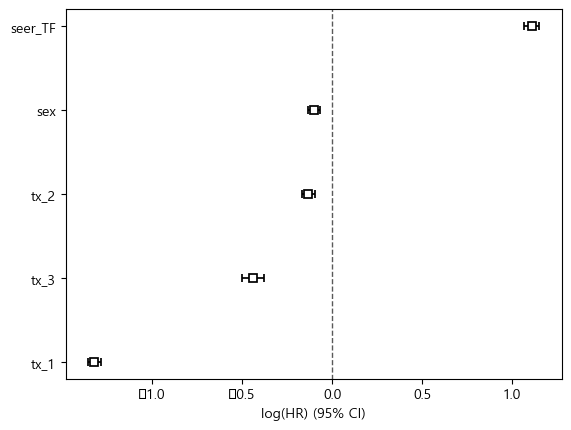

In [17]:
cph.plot()